In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [12]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


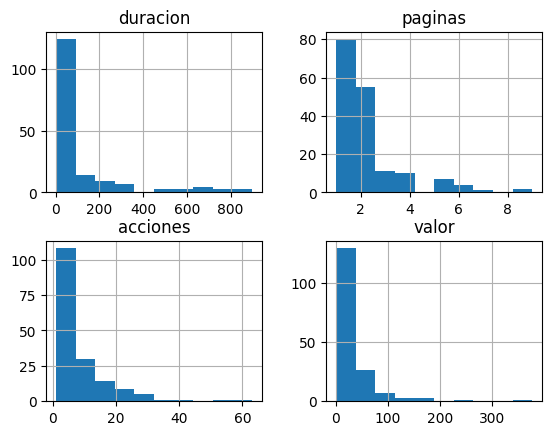

In [16]:
dataframe.drop(['clase'],axis = 1).hist()
plt.show()

/home/hector/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


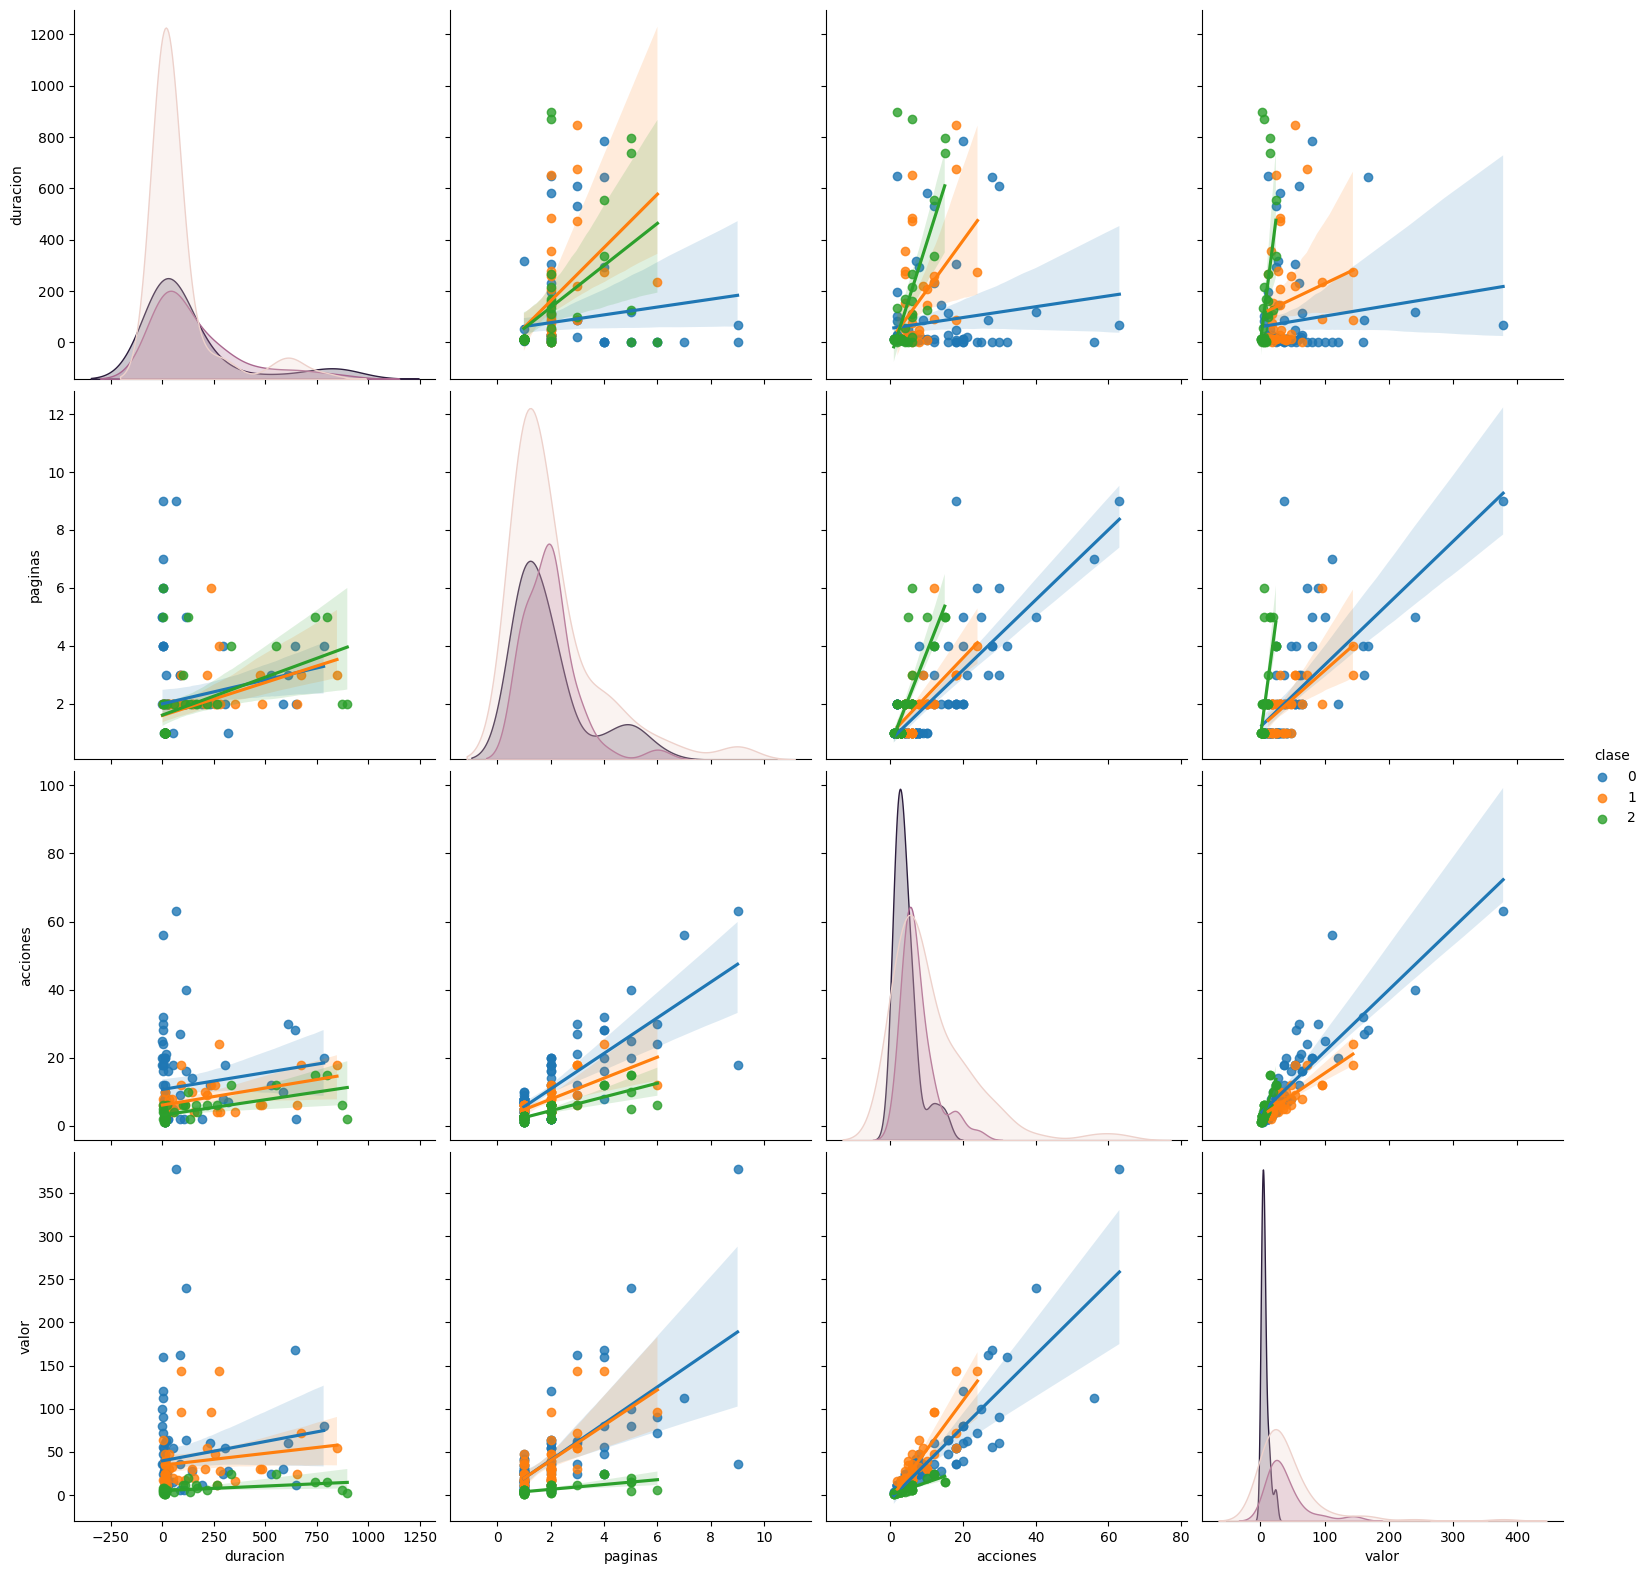

In [13]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')


In [18]:
X = np.array(dataframe.drop(['clase'], axis=1))  # Corregido para usar 'axis=1'
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [21]:
model = linear_model.LogisticRegression(max_iter=1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [24]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


In [25]:
model.score(X,y)

0.7764705882352941

In [26]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)


In [33]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.720330 (0.151123)


In [34]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


In [35]:
print(confusion_matrix(Y_validation, predictions))

[[16  1  1]
 [ 3  3  0]
 [ 0  0 10]]


In [36]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.75      0.50      0.60         6
           2       0.91      1.00      0.95        10

    accuracy                           0.85        34
   macro avg       0.83      0.80      0.81        34
weighted avg       0.85      0.85      0.84        34



In [37]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

/home/hector/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2])